# This Method uses Cash-Karp Method !

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline 


## Coupled Derivative to Intergrate


In [18]:
def dydx(x,y):
    
    A = 1
    B = 0 
    C = 0
    D = 2/3
    
    y_derivs = np.zeros(2)
    
    y_derivs[0] = y[1]
    
    y_derivs[1] = -A*np.sin(y[0]) - B*y[1] + C*np.sin(D*x)
    
    return y_derivs

## 4th Order RK Method 

In [19]:
def rk4_mv_core(dydx,xi,yi,nv,h):
    
    k1 = np.zeros(nv)
    k2 = np.zeros(nv)
    k3 = np.zeros(nv)
    k4 = np.zeros(nv) 
    k5 = np.zeros(nv)
    k6 = np.zeros(nv)
    
    x_ipo = xi + h 
    
    y_temp2 = np.zeros(nv)
    y_temp3 = np.zeros(nv)
    y_temp4 = np.zeros(nv)
    y_temp5 = np.zeros(nv)
    y_temp6 = np.zeros(nv)
    
    y_derivs = dydx(xi,yi)
    k1[:] = h*y_derivs[:] 
    
    
    y_temp2[:] = yi[:] + (1/5)*k1[:]
    y_derivs = dydx(xi + (1/5)*h, y_temp2) 
    k2[:] = h*y_derivs[:] 
    
    
    y_temp3[:] = yi[:] + (3/40)*k1[:] + (9/40)*k2[:]
    y_derivs = dydx(xi + (3/10)*h, y_temp3)
    k3[:] = h*y_derivs[:]
    
    
    y_temp4[:] = yi[:] + (3/10)*k1[:] + -1*(9/10)*k2[:] + (6/5)*k3[:] 
    y_derivs = dydx(xi + (3/5)*h, y_temp4)
    k4[:] = h*y_derivs[:]
    
    
    y_temp5[:] = yi[:] + -1*(11/54)*k1[:] + (5/2)*k2[:] + -1*(70/27)*k3[:] + (35/27)*k4[:]
    y_derivs = dydx(xi + h, y_temp5)
    k5[:] = h*y_derivs[:]
    
    
    y_temp6[:] = yi[:] + (1631/55296)*k1[:] + (175/512)*k2[:] + (575/13824)*k3[:] + (44275/110592)*k4[:] + (253/4096)*k5[:]
    y_derivs = dydx(xi + (7/8)*h, y_temp6)
    k6[:] = h*y_derivs[:]
    
    
    yipo = yi + (37/378)*k1 + (0)*k2 + (250/621)*k3 + (125/594)*k4 + (0)*k5 + (512/1771)*k6
    
    return yipo 

## Adaptive Step Size for RK4

In [20]:
def rk4_mv_ad(dydx,x_i,y_i,nv,h,tol):
    
    SAFETY = 0.9 
    H_NEW_FAC = 2.0 
    
    imax = 10000
    
    i = 0
    
    Delta = np.full(nv,2*tol) 
    
    h_step = h 
    
    while(Delta.max()/tol > 1.0):
        
        y_2 = rk4_mv_core(dydx,x_i,y_i,nv,h_step)
        y_1 = rk4_mv_core(dydx,x_i,y_i,nv,0.5*h_step)
        y_11 = rk4_mv_core(dydx,x_i+0.5*h_step,y_1,nv,0.5*h_step)
        
        Delta = np.fabs(y_2 - y_11)
        
        if(Delta.max()/tol > 1.0):
            h_step *= SAFETY * (Delta.max()/tol)**(-0.25)
            
        if(i>=imax):
            print('Too many iterations in rk4_mv_ad()' )
            raise StopIteration ("Ending after i =",i)
            
        i += 1 
            
    h_new = np.fmin(h_step * (Delta.max()/tol)**(-0.9), h_step*H_NEW_FAC)
        
    return y_2, h_new, h_step
                        

## Wrapper for RK4

In [21]:
def rk4_mv(dydx,a,b,y_a,tol):
    
    xi = a 
    yi = y_a.copy()
    
    h = 1.0e-4 * (b-a) 
    
    imax = 10000
    
    i = 0 
    
    nv = len(y_a) 
    
    x = np.full(1,a)
    y = np.full((1,nv),y_a)
    
    flag = 1
    
    while(flag): 
        
        yi_new, h_new, h_step = rk4_mv_ad(dydx,xi,yi,nv,h,tol)
        
        h = h_new
        
        if(xi+h_step>b):
            
            h = b-xi
            
            yi_new, h_new, h_step = rk4_mv_ad(dydx,xi,yi,nv,h,tol)
            
            flag = 0 
            
        xi += h_step 
        yi[:] = yi_new[:]
        
        x = np.append(x,xi)
        y_new = np.zeros((len(x),nv))
        y_new[0:len(x)-1,:] = y
        y_new[-1,:] = yi[:]
        del y 
        y = y_new
        
        if(i>=imax): #missing = !!!!!
            
            print("Maximum iterations reached.")
            raise StopIteration("Iteration number = ",i)
            
        i += 1
        
        s = "i = %3d\tx = %9.8f\th = %9.8f\tb=%9.8f" % (i,xi,h_step,b)
        print(s)
        
        if(xi==b):
            flag = 0 
            
    return x,y # indented inside fxn
    

## Performing the Itergations 



In [22]:
a = 0.0 
b = 100.0

y_0 = np.zeros(2) 
y_0[0] = 0.0 
y_0[1] = 1.0 
nv = 2

tolerance = 1.0e-6

x,y = rk4_mv(dydx,a,b,y_0,tolerance)

i =   1	x = 0.01000000	h = 0.01000000	b=100.00000000
i =   2	x = 0.03000000	h = 0.02000000	b=100.00000000
i =   3	x = 0.07000000	h = 0.04000000	b=100.00000000
i =   4	x = 0.15000000	h = 0.08000000	b=100.00000000
i =   5	x = 0.31000000	h = 0.16000000	b=100.00000000
i =   6	x = 0.63000000	h = 0.32000000	b=100.00000000
i =   7	x = 1.09352435	h = 0.46352435	b=100.00000000
i =   8	x = 1.37424772	h = 0.28072337	b=100.00000000
i =   9	x = 1.71965874	h = 0.34541102	b=100.00000000
i =  10	x = 2.05586568	h = 0.33620694	b=100.00000000
i =  11	x = 2.53548181	h = 0.47961613	b=100.00000000
i =  12	x = 2.82985864	h = 0.29437683	b=100.00000000
i =  13	x = 3.09743267	h = 0.26757403	b=100.00000000
i =  14	x = 3.35935741	h = 0.26192474	b=100.00000000
i =  15	x = 3.63309868	h = 0.27374127	b=100.00000000
i =  16	x = 3.95330987	h = 0.32021119	b=100.00000000
i =  17	x = 4.49779208	h = 0.54448221	b=100.00000000
i =  18	x = 4.76018707	h = 0.26239500	b=100.00000000
i =  19	x = 5.11648840	h = 0.35630132	b=100.00

i = 190	x = 62.72493770	h = 0.33491175	b=100.00000000
i = 191	x = 63.22619693	h = 0.50125923	b=100.00000000
i = 192	x = 63.56786327	h = 0.34166633	b=100.00000000
i = 193	x = 63.80834856	h = 0.24048530	b=100.00000000
i = 194	x = 64.08400810	h = 0.27565954	b=100.00000000
i = 195	x = 64.35623524	h = 0.27222714	b=100.00000000
i = 196	x = 64.68912856	h = 0.33289332	b=100.00000000
i = 197	x = 65.13247117	h = 0.44334260	b=100.00000000
i = 198	x = 65.41956883	h = 0.28709766	b=100.00000000
i = 199	x = 65.76154230	h = 0.34197347	b=100.00000000
i = 200	x = 66.09645339	h = 0.33491110	b=100.00000000
i = 201	x = 66.59770994	h = 0.50125655	b=100.00000000
i = 202	x = 66.93937428	h = 0.34166434	b=100.00000000
i = 203	x = 67.17986060	h = 0.24048632	b=100.00000000
i = 204	x = 67.45551940	h = 0.27565881	b=100.00000000
i = 205	x = 67.72774597	h = 0.27222657	b=100.00000000
i = 206	x = 68.06063708	h = 0.33289112	b=100.00000000
i = 207	x = 68.50398986	h = 0.44335278	b=100.00000000
i = 208	x = 68.79108434	h = 

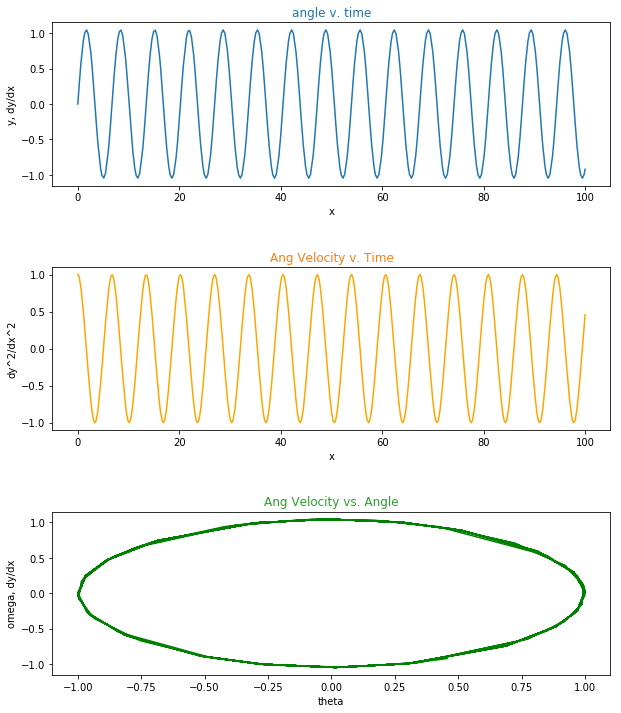

In [23]:
f, axarr = plt.subplots(3,1, figsize=(10,12))

axarr[0].plot(x, y[:,0], '-', label='y(x)')

axarr[0].set_xlabel('x')
axarr[0].set_ylabel('y, dy/dx')
axarr[0].set_title('angle v. time', color='C0')
axarr[0].axis()
#axarr[0].set_aspect(100)

axarr[1].plot(x, y[:,1], '-', color='orange', label='dydx(x)')
axarr[1].set_xlabel('x')
axarr[1].set_ylabel('dy^2/dx^2')
axarr[1].set_title('Ang Velocity v. Time', color='C1')

axarr[2].plot(y[:,1], y[:,0], '-', color='green', label='omega(theta)')

axarr[2].set_xlabel('theta')
axarr[2].set_ylabel('omega, dy/dx')
axarr[2].set_title('Ang Velocity vs. Angle', color='C2')

f.subplots_adjust(wspace = 1.0)
#fig = plt.figure(figsize = (6,6))

plt.subplots_adjust(hspace=0.5)

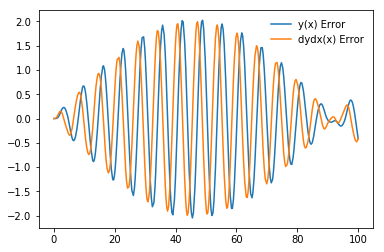

In [24]:
sine = np.sin(x) 
cosine = np.cos(x)

y_error = (y[:,0] - sine)
dydx_error = (y[:,1] - cosine)

plt.plot(x, y_error, label="y(x) Error")
plt.plot(x, dydx_error, label="dydx(x) Error")
plt.legend(frameon=False)